# LDDS

# Tutorial 10: Lagrangian descriptors for Stochastic Dynamical Systems

In this tutorial notebook we demonstrate how to calculate Lagrangian descriptors for two-dimensional stochastic dynamical systems with additive noise. We do so by applying it to three simple examples: the linear saddle, the Duffing oscillator and the Double Gyre flow.

In [21]:
import os, sys
sys.path.insert(1, os.pardir)
import ldds
from ldds.base import EulerMaruyama_solver
from ldds.vector_fields import HamSaddle1D, Duffing1D, DoubleGyre
from ldds.base_discrete import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
import numpy as np

## Noisy Saddle

The stochastic dynamical system representing the linear saddle is described by the following SDEs:

\begin{cases}
   d X_t = X_t \, dt + \sigma_1 dW_t^1 \\[.2cm]
   d Y_t = -Y_t \, dt + \sigma_2 dW_t^2
\end{cases}

where $W^1$ and $W^2$ are Wiener processes.

### Define the linear saddle deterministic vector field

In [22]:
vector_field = HamSaddle1D

### Define the 2D Grid to Compute LDs

In [32]:
# Mesh parameters
x_min,x_max = [-1, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Construct iterative solution map using Euler-Maruyama scheme

In [33]:
# Time step
dt = 0.01

# Define noise amplitudes
sigma1, sigma2 = [-0.5, 0.5]
noise_amplitude = [sigma1, sigma2]

# Define the SDE and construct EM scheme
discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

### Define Lagrangian Descriptor

In [34]:
# Integration time
tau = 8

# Number of Iterations for Euler-Maruyama
N_iterations = int(tau/dt)

# LDp, p-value
p_value = 0.5

### Compute LDs and Plot Results

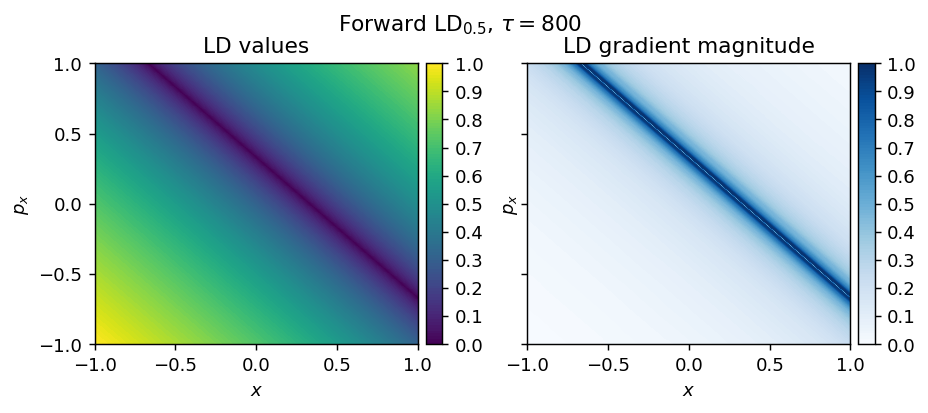

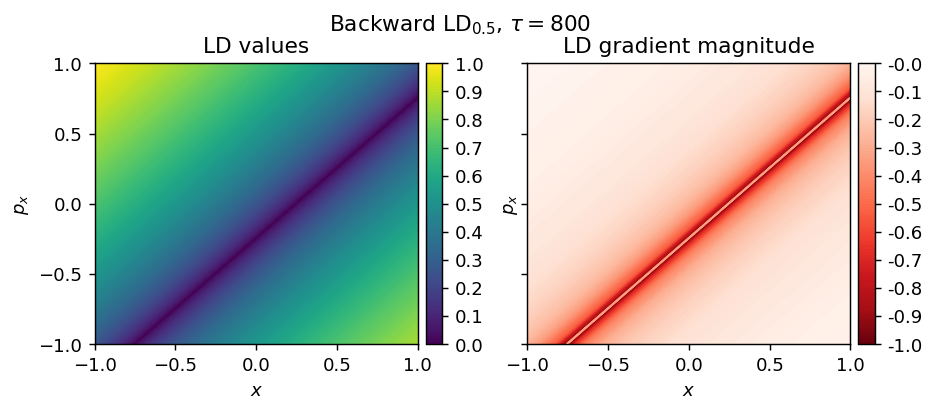

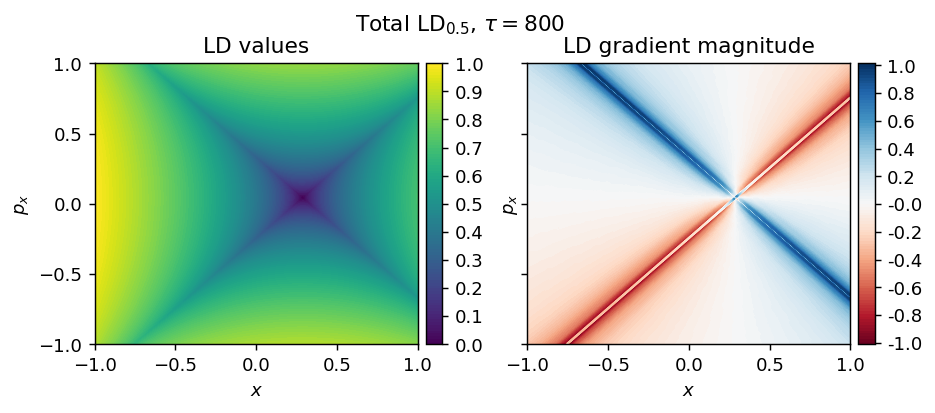

In [35]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

### Several experiments

Stochastic Lagrangian descriptors can be calculated for several random experiments and the output obtained is the expectation value of all trials

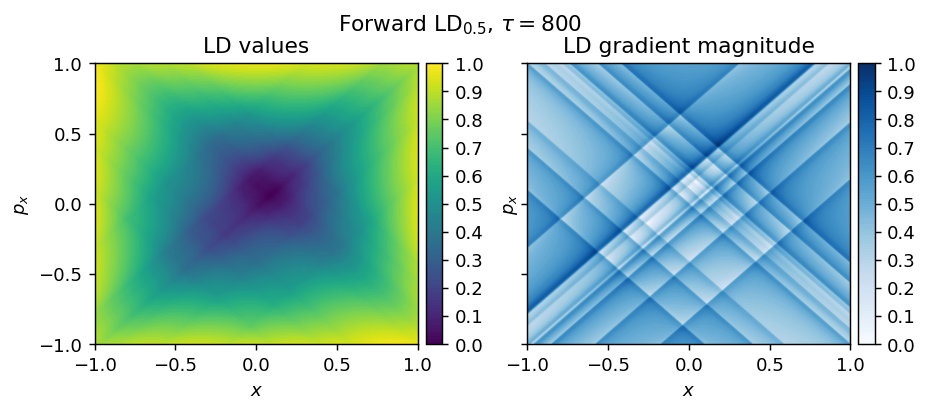

In [36]:
N_trials = 10

LD_total_trials = []

for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)
    LD_total = LD_forward + LD_backward
    LD_total_trials.append(LD_total)

LD_total_mean = np.array(LD_total_trials).mean(axis=0)

figs = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)

## Noisy Duffing Oscillator

The stochastic Duffing oscillator is described by the system of SDEs:

\begin{cases}
   d X_t = Y_t \, dt + \sigma_1 d W_t^1 \\[.2cm]
   d Y_t = \left(\alpha X_t - \beta X_t^3 \right) \, dt + \sigma_2 d W_t^2
\end{cases}

### Define the deterministic part of the vector field

In [48]:
# Duffing oscillator parameters
alpha, beta = [1, 1]
vector_field = lambda t,u: Duffing1D(t, u, PARAMETERS = [alpha, beta])

### Define the 2D Grid to Compute LDs

In [49]:
# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Construct iterative solution map using Euler-Maruyama scheme

In [50]:
# Time step
dt = 0.01

# Define noise amplitudes
sigma1, sigma2 = [0, 0.25]
noise_amplitude = [sigma1, sigma2]

# Define the SDE and construct EM scheme
discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

### Define the Lagrangian Descriptor

In [51]:
# Integration time
tau = 8

# Number of Iterations for Euler-Maruyama
N_iterations = int(tau/dt)

# LDp, p-value
p_value = 0.5

### Compute LDs and Plot Results

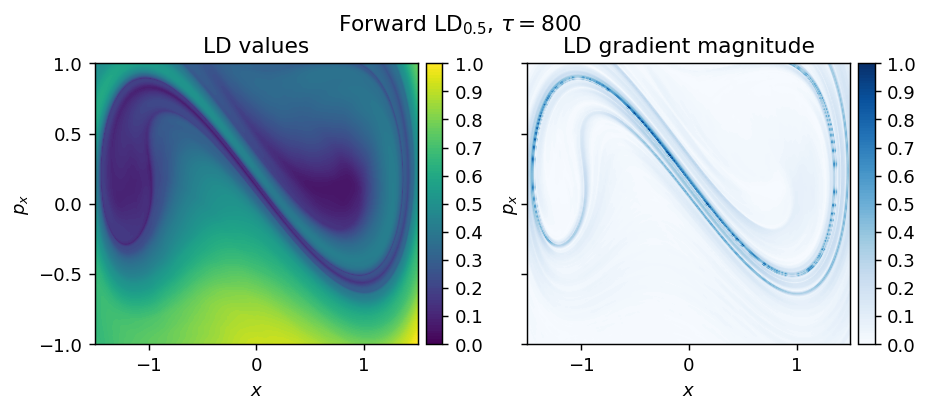

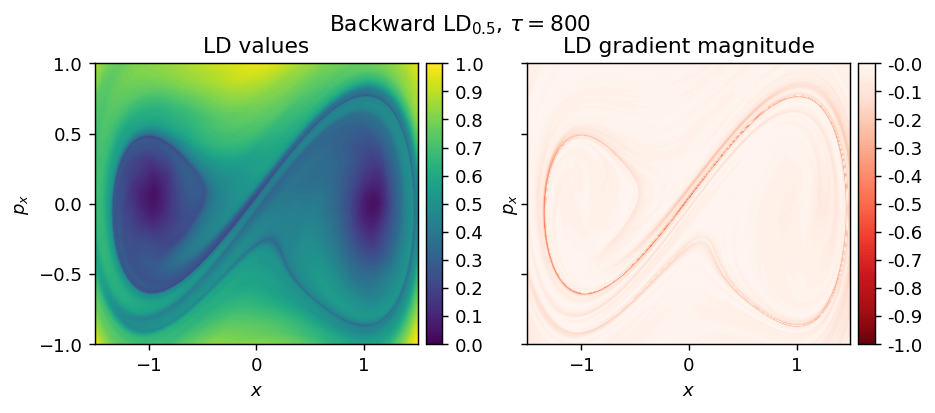

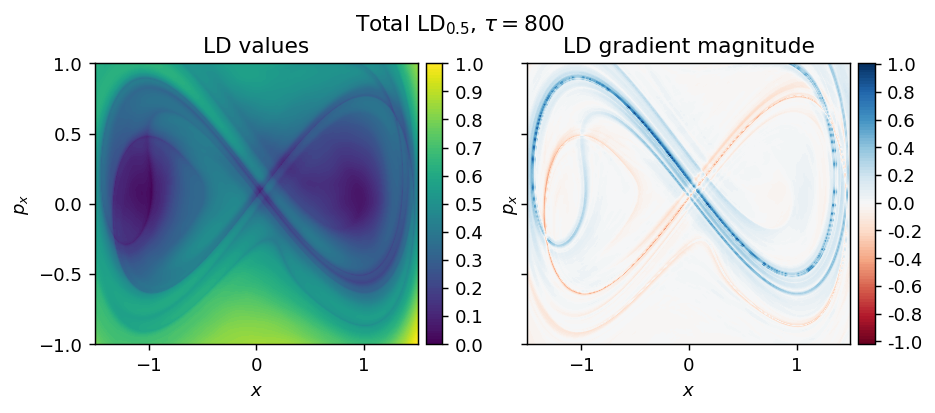

In [52]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

__Several experiments__

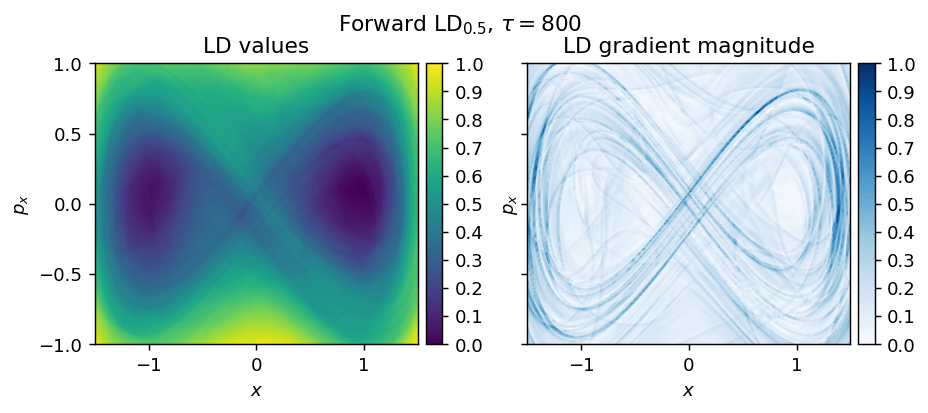

In [55]:
N_trials = 10

LD_total_trials = []

for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)
    LD_total = LD_forward + LD_backward
    LD_total_trials.append(LD_total)

LD_total_mean = np.array(LD_total_trials).mean(axis=0)

figs = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)

## Noisy Double Gyre

The stochastic dynamical system corresponding to the double gyre flow is described by the following SDEs:

\begin{cases}
   d X_t = \left(-\pi A \sin\left(\dfrac{\pi f(X_t,t)}{s}\right)\cos\left(\dfrac{\pi Y_t}{s}\right) - \mu X_t\right) \, dt + \sigma_1 \, dW_t^1 \\[.2cm]
   d Y_t = \left(\pi A \cos\left(\dfrac{\pi f(X_t,t)}{s}\right)\sin\left(\dfrac{\pi Y_t}{s}\right)\dfrac{\partial f}{\partial x}\left(X_t,t\right) - \mu Y_t\right) \, dt + \sigma_2  \, dW_t^2
\end{cases}

where $W^1$ and $W^2$ are Wiener processes and we have that:

$$
f(X_t,t) = \varepsilon \sin(\omega t + \phi) X_t^2 + \left(1-2\varepsilon\sin(\omega t + \phi)\right)X_t
$$

### Define the deterministic part of the vector field

In [56]:
vector_field = DoubleGyre

### Define the 2D Grid to Compute LDs

In [57]:
# Mesh parameters
x_min,x_max = [0, 2]
y_min,y_max = [0, 1]
Nx, Ny = [300, 300]
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]

### Construct iterative solution map using Euler-Maruyama scheme

In [58]:
# Time step
dt = 0.01

# Define noise amplitudes
sigma1, sigma2 = [0.1, 0.1]
noise_amplitude = [sigma1, sigma2]

# Define the SDE and construct EM scheme
discrete_map_forward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, dt, noise_amplitude)
discrete_map_backward = lambda t, u : EulerMaruyama_solver(t, u, vector_field, -dt, noise_amplitude)

### Define the Lagrangian Descriptor

In [59]:
# Integration time
tau = 8

# Number of Iterations for Euler-Maruyama
N_iterations = int(tau/dt)

# LDp, p-value
p_value = 0.5

### Compute LDs and Plot Results

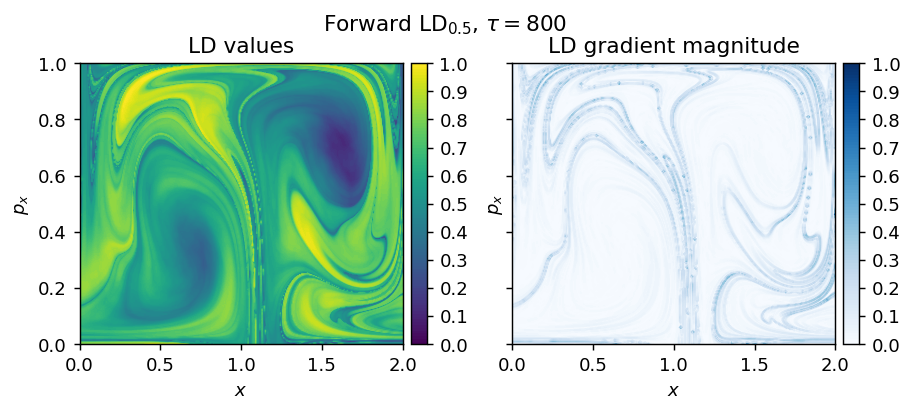

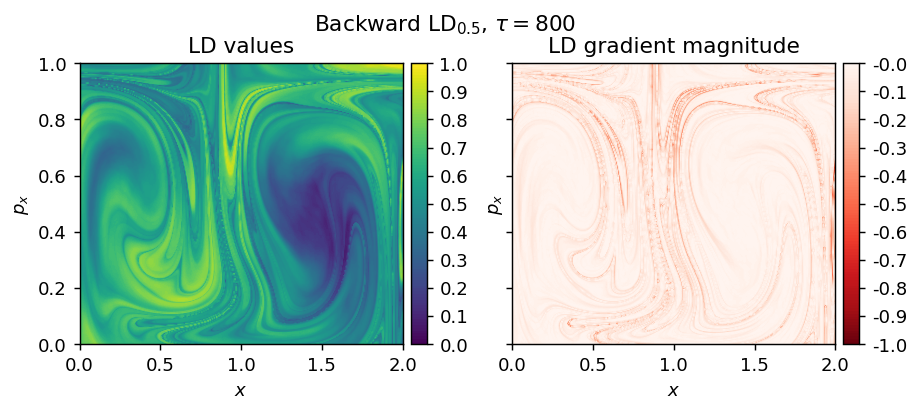

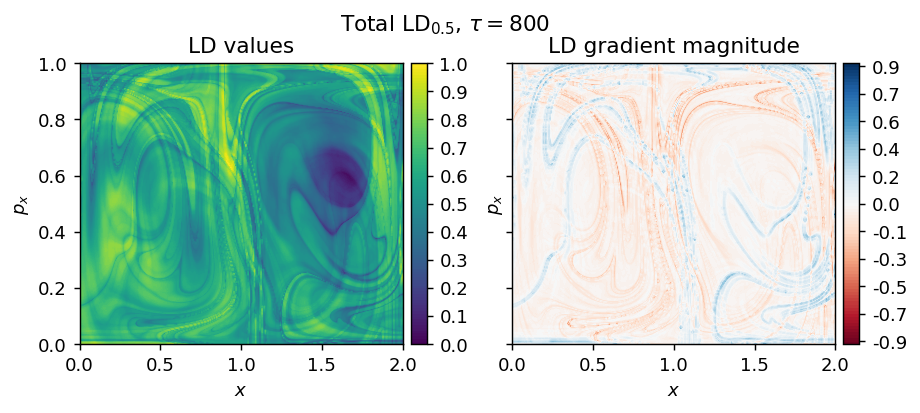

In [60]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, N_iterations, p_value)

__Several experiments__

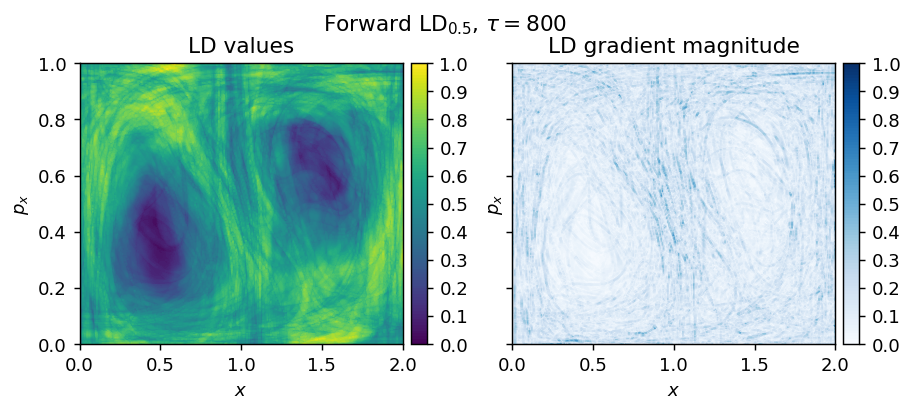

In [61]:
N_trials = 10

LD_total_trials = []

for n in range(N_trials):
    LD_forward = compute_lagrangian_descriptor(grid_parameters, discrete_map_forward, N_iterations, p_value)
    LD_backward = compute_lagrangian_descriptor(grid_parameters, discrete_map_backward, N_iterations, p_value)
    LD_total = LD_forward + LD_backward
    LD_total_trials.append(LD_total)

LD_total_mean = np.array(LD_total_trials).mean(axis=0)

figs = draw_all_lds(LD_total_mean, [], grid_parameters, N_iterations, p_value)